# **Course Project**

## **Background**
Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: http://groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset). 

## **Data**

The training data for this project are available here: 

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv

The test data are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

The data for this project come from this source: http://groupware.les.inf.puc-rio.br/har. If you use the document you create for this class for any purpose please cite them as they have been very generous in allowing their data to be used for this kind of assignment. 

## **What you should submit**

The goal of your project is to predict the manner in which they did the exercise. This is the "classe" variable in the training set. You may use any of the other variables to predict with. You should create a report describing how you built your model, how you used cross validation, what you think the expected out of sample error is, and why you made the choices you did. You will also use your prediction model to predict 20 different test cases. 

## **Peer Review Portion**

Your submission for the Peer Review portion should consist of a link to a Github repo with your R markdown and compiled HTML file describing your analysis. Please constrain the text of the writeup to < 2000 words and the number of figures to be less than 5. It will make it easier for the graders if you submit a repo with a gh-pages branch so the HTML page can be viewed online (and you always want to make it easy on graders :-).

## **Course Project Prediction Quiz Portion**

Apply your machine learning algorithm to the 20 test cases available in the test data above and submit your predictions in appropriate format to the Course Project Prediction Quiz for automated grading. 

## **Reproducibility**

Due to security concerns with the exchange of R code, your code will not be run during the evaluation by your classmates. Please be sure that if they download the repo, they will be able to view the compiled HTML version of your analysis. 

## **Exploratory Data Analysis**

In [1]:
library(caret)
library(rpart)
library(rpart.plot)
library(RColorBrewer)
library(randomForest)
library(gbm)

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loaded gbm 2.1.8



In [2]:
training_data <- read.csv('pml-training.csv')
testing_data <- read.csv('pml-testing.csv')

In [3]:
head(training_data)

,X,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,⋯,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.03,0.00,-0.02,192,203,-215,-17,654,476,A
2,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,⋯,0.02,0.00,-0.02,192,203,-216,-18,661,473,A
3,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,⋯,0.03,-0.02,0.00,196,204,-213,-18,658,469,A
4,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,⋯,0.02,-0.02,0.00,189,206,-214,-16,658,469,A
5,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,⋯,0.02,0.00,-0.02,189,206,-214,-17,655,473,A
6,6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,⋯,0.02,-0.02,-0.03,193,203,-215,-9,660,478,A


In [4]:
head(testing_data)

,X,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,⋯,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,⋯,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
2,2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,⋯,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
3,3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,⋯,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
4,4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,⋯,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
5,5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,⋯,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
6,6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,⋯,-0.88,4.26,1.35,230,322,-144,-300,800,884,6


In [5]:
dim(training_data)
dim(testing_data)

[1] 19622   160

[1]  20 160

## **Preprocessing**

In [6]:
nonZero <- nearZeroVar(training_data)

training_data <- training_data[, -nonZero]
testing_data <- testing_data[, -nonZero]

In [7]:
dim(training_data)

[1] 19622   100

In [8]:
nas <- sapply(training_data, function(x) mean(is.na(x))) > 0.95

In [9]:
nas

X                user_name     raw_timestamp_part_1 
                   FALSE                    FALSE                    FALSE 
    raw_timestamp_part_2           cvtd_timestamp               num_window 
                   FALSE                    FALSE                    FALSE 
               roll_belt               pitch_belt                 yaw_belt 
                   FALSE                    FALSE                    FALSE 
        total_accel_belt            max_roll_belt           max_picth_belt 
                   FALSE                     TRUE                     TRUE 
           min_roll_belt           min_pitch_belt      amplitude_roll_belt 
                    TRUE                     TRUE                     TRUE 
    amplitude_pitch_belt     var_total_accel_belt            avg_roll_belt 
                    TRUE                     TRUE                     TRUE 
        stddev_roll_belt            var_roll_belt           avg_pitch_belt 
                    TRUE                     TRUE                     TRUE 
       stddev_pitch_belt           var_pitch_belt             avg_yaw_belt 
                    TRUE                     TRUE                     TRUE 
         stddev_yaw_belt             var_yaw_belt             gyros_belt_x 
                    TRUE                     TRUE                    FALSE 
            gyros_belt_y             gyros_belt_z             accel_belt_x 
                   FALSE                    FALSE                    FALSE 
            accel_belt_y             accel_belt_z            magnet_belt_x 
                   FALSE                    FALSE                    FALSE 
           magnet_belt_y            magnet_belt_z                 roll_arm 
                   FALSE                    FALSE                    FALSE 
               pitch_arm                  yaw_arm          total_accel_arm 
                   FALSE                    FALSE                    FALSE 
           var_accel_arm              gyros_arm_x              gyros_arm_y 
                    TRUE                    FALSE                    FALSE 
             gyros_arm_z              accel_arm_x              accel_arm_y 
                   FALSE                    FALSE                    FALSE 
             accel_arm_z             magnet_arm_x             magnet_arm_y 
                   FALSE                    FALSE                    FALSE 
            magnet_arm_z            max_picth_arm              max_yaw_arm 
                   FALSE                     TRUE                     TRUE 
             min_yaw_arm        amplitude_yaw_arm            roll_dumbbell 
                    TRUE                     TRUE                    FALSE 
          pitch_dumbbell             yaw_dumbbell        max_roll_dumbbell 
                   FALSE                    FALSE                     TRUE 
      max_picth_dumbbell        min_roll_dumbbell       min_pitch_dumbbell 
                    TRUE                     TRUE                     TRUE 
 amplitude_roll_dumbbell amplitude_pitch_dumbbell     total_accel_dumbbell 
                    TRUE                     TRUE                    FALSE 
      var_accel_dumbbell        avg_roll_dumbbell     stddev_roll_dumbbell 
                    TRUE                     TRUE                     TRUE 
       var_roll_dumbbell       avg_pitch_dumbbell    stddev_pitch_dumbbell 
                    TRUE                     TRUE                     TRUE 
      var_pitch_dumbbell         avg_yaw_dumbbell      stddev_yaw_dumbbell 
                    TRUE                     TRUE                     TRUE 
        var_yaw_dumbbell         gyros_dumbbell_x         gyros_dumbbell_y 
                    TRUE                    FALSE                    FALSE 
        gyros_dumbbell_z         accel_dumbbell_x         accel_dumbbell_y 
                   FALSE                    FALSE                    FALSE 
        accel_dumbbell_z        magnet_dumbbell_x        magnet_dumbbel

In [10]:
training_data <- training_data[,nas == FALSE]
testing_data <- testing_data[,nas == FALSE]

In [11]:
dim(training_data)

[1] 19622    59

In [12]:
summary(training_data)

       X          user_name         raw_timestamp_part_1 raw_timestamp_part_2
 Min.   :    1   Length:19622       Min.   :1.322e+09    Min.   :   294      
 1st Qu.: 4906   Class :character   1st Qu.:1.323e+09    1st Qu.:252912      
 Median : 9812   Mode  :character   Median :1.323e+09    Median :496380      
 Mean   : 9812                      Mean   :1.323e+09    Mean   :500656      
 3rd Qu.:14717                      3rd Qu.:1.323e+09    3rd Qu.:751891      
 Max.   :19622                      Max.   :1.323e+09    Max.   :998801      
 cvtd_timestamp       num_window      roll_belt        pitch_belt      
 Length:19622       Min.   :  1.0   Min.   :-28.90   Min.   :-55.8000  
 Class :character   1st Qu.:222.0   1st Qu.:  1.10   1st Qu.:  1.7600  
 Mode  :character   Median :424.0   Median :113.00   Median :  5.2800  
                    Mean   :430.6   Mean   : 64.41   Mean   :  0.3053  
                    3rd Qu.:644.0   3rd Qu.:123.00   3rd Qu.: 14.9000  
                    Ma

In [13]:
chars <- sapply(training_data, is.character)

In [14]:
training_data <- subset(training_data, select = -c(X, user_name, cvtd_timestamp))

### **Data Partitioning**

In [15]:
partition <- createDataPartition(training_data$classe, p=0.6, list=FALSE)
training_data <- training_data[partition,]
testing_data <- training_data[-partition,]

dim(training_data)

[1] 11776    56

In [16]:
dim(testing_data)

[1] 4710   56

### **Models**

In [17]:
model <- train(classe ~ ., data = training_data, method="rpart")

In [18]:
pred <- predict(model, testing_data)

In [20]:
confusionMatrix(pred, as.factor(testing_data$classe))


Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1217  406  374  360  112
         B   15  308   24  126  123
         C   96  191  428  283  221
         D    0    0    0    0    0
         E   17    0    0    0  409

Overall Statistics
                                          
               Accuracy : 0.5015          
                 95% CI : (0.4871, 0.5159)
    No Information Rate : 0.2856          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3475          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9048  0.34033  0.51816   0.0000  0.47283
Specificity            0.6279  0.92431  0.79634   1.0000  0.99558
Pos Pred Value         0.4929  0.51678  0.35111      NaN  0.96009
Neg Pred Value         0.9429  0.8548

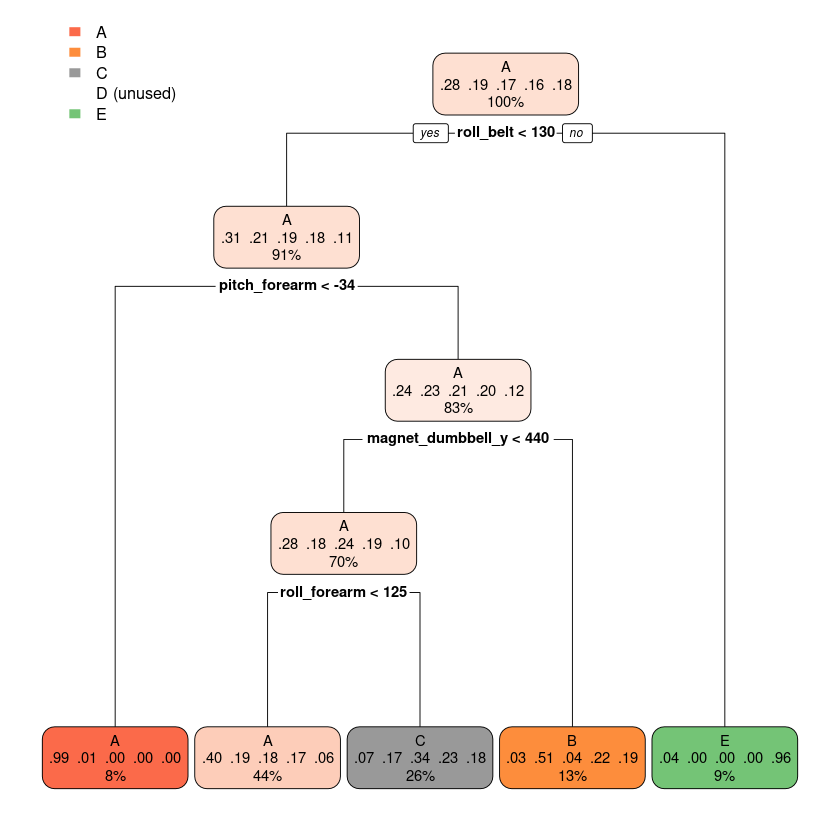

In [21]:
rpart.plot(model$finalModel, roundint = FALSE)

In [22]:
model_2 <- train(classe ~ ., data = training_data, method = "rf", ntree = 50)

In [29]:
pred1 <- predict(model_2, testing_data)
RF_CM <- confusionMatrix(pred1, as.factor(testing_data$classe))
RF_CM

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1345    0    0    0    0
         B    0  905    0    0    0
         C    0    0  826    0    0
         D    0    0    0  769    0
         E    0    0    0    0  865

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9992, 1)
    No Information Rate : 0.2856     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   1.0000   1.0000   1.0000   1.0000
Specificity            1.0000   1.0000   1.0000   1.0000   1.0000
Pos Pred Value         1.0000   1.0000   1.0000   1.0000   1.0000
Neg Pred Value         1.0000   1.0000   1.0000   1.0000   1.0000
Prevalence      

In [27]:
model_3 <- train(classe ~ ., data = training_data, method = "gbm", verbose = FALSE)

In [30]:
pred2 <- predict(model_3, testing_data)
GBM_CM <- confusionMatrix(pred2, as.factor(testing_data$classe))
GBM_CM

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1345    0    0    0    0
         B    0  905    3    0    0
         C    0    0  821    3    0
         D    0    0    2  766    0
         E    0    0    0    0  865

Overall Statistics
                                          
               Accuracy : 0.9983          
                 95% CI : (0.9967, 0.9993)
    No Information Rate : 0.2856          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9979          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   1.0000   0.9939   0.9961   1.0000
Specificity            1.0000   0.9992   0.9992   0.9995   1.0000
Pos Pred Value         1.0000   0.9967   0.9964   0.9974   1.0000
Neg Pred Value         1.0000   1.000

In [31]:
RF_CM$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     1.0000000      1.0000000      0.9992171      1.0000000      0.2855626 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

In [32]:
GBM_CM$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.9983015      0.9978510      0.9966560      0.9992664      0.2855626 
AccuracyPValue  McnemarPValue 
     0.0000000            NaN

## **Conclusion**

The Random Forest Model has a perfect accuracy of 1, so we will use this model for the final prediction

In [33]:
final_pred <- read.csv('pml-testing.csv')

In [34]:
predict(model_2, final_pred)

[1] B A B A A E D B A A B C B A E E A B B B
Levels: A B C D E